In [23]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster

In [6]:
v = 'v3'

In [10]:
linkage_matrix = np.load(f'/data/uscuni-ulce/processed_data/clusters/kmeans_linkage_{v}.npy')
normalised_cdata = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cdata_{v}.pq')
regional_ward_morphotopes_data = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cluster_input_data_{v}.pq')

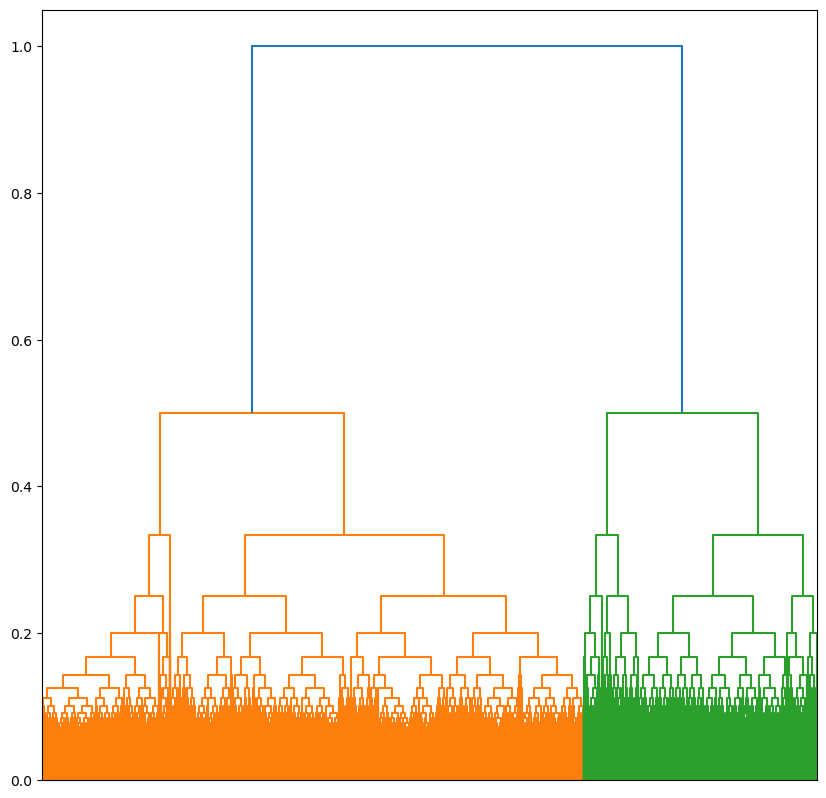

In [11]:
## final dendrogram

fig,ax = plt.subplots(figsize=(10,10))
_ = dendrogram(linkage_matrix, ax=ax, no_labels=True)

In [17]:
final_cutoff = 1/4 -0.00001
clusters = fcluster(linkage_matrix, t=final_cutoff, criterion='distance')
final_clusters = pd.Series(clusters, regional_ward_morphotopes_data.index)
final_clusters.value_counts()

8     11858
6     10218
1     10043
7      8197
14     7144
13     5660
5      5249
12     2323
15     1642
9      1500
2       974
16      882
11      783
10       13
3         5
4         3
Name: count, dtype: int64

In [18]:
total_median = regional_ward_morphotopes_data.median()

In [19]:
cluster_medians = regional_ward_morphotopes_data.groupby(final_clusters).median()

In [20]:
cluster_medians

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbCor,ssbSqu,ssbERI,ssbElo,mtbSWR,libNCo,...,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS
1,-0.291608,-0.237923,-0.003878,-0.640917,-0.544985,-0.020691,0.327785,-0.588126,1.280698,-0.073819,...,0.199643,-0.956629,-1.118702,-1.399667,0.561559,0.559586,0.559586,-0.129552,-0.206540,2.000000
2,0.337875,0.558216,-0.003878,-1.271123,1.457527,0.820938,-0.618228,-0.573424,2.016229,2.336456,...,2.643875,-0.717437,-4.549659,-2.188842,3.666944,1.786155,1.786155,-0.020830,-0.074186,2.000000
3,1.961379,3.015519,-0.003878,-2.786313,-0.544985,-0.104772,0.459527,-2.323409,2.592783,50.541964,...,44.684226,-0.609943,-6.067423,-2.032325,32.655724,20.869033,20.869033,9.486329,6.567514,2.000000
4,5.542762,6.240238,-0.003878,-3.919670,1.457527,-0.073128,-0.755432,-2.555688,2.026790,33.670036,...,105.323935,-1.399271,-6.322386,-1.833638,66.134341,38.085499,38.085499,58.419477,11.113071,2.000000
5,-0.098248,-0.063543,-0.003878,0.609169,-0.544985,-0.115558,0.361484,0.736577,-0.930174,-0.073819,...,-0.187092,0.763880,0.511164,0.846538,-0.373880,-0.419268,-0.419268,-0.145588,-0.238231,2.000000
6,-0.477231,-0.498715,-0.003878,0.422461,-0.544985,-0.124691,0.424478,0.514392,0.333231,-0.073819,...,-0.129809,0.437418,0.054522,0.213860,-0.229992,-0.198975,-0.198975,-0.143461,-0.250938,2.000000
7,-0.433335,-0.447083,-0.003878,0.659186,-0.544985,-0.131574,0.439488,0.751118,-0.433946,-0.073819,...,-0.168110,0.680720,0.404868,0.634472,-0.322309,-0.332856,-0.332856,-0.139053,-0.247801,2.000000
8,-0.200759,-0.153787,-0.003878,0.138727,-0.544985,-0.089940,0.430449,0.118395,0.106990,-0.073819,...,-0.106292,0.137115,0.068188,-0.024701,-0.161263,-0.069008,-0.069008,-0.104905,-0.177097,2.000000
9,0.442524,0.538916,-0.003878,-0.405543,-0.544985,-0.111380,0.462080,-0.894903,-0.930174,-0.073819,...,-0.183740,-0.259521,0.870491,0.469497,-0.343577,-0.319415,-0.319415,-0.136947,-0.129504,2.000000
10,3.989402,2.850008,-0.003878,12.396350,-4.550008,42.797226,8.444450,4.166960,-0.930174,-0.073819,...,-0.080669,3.326172,1.908447,6.004206,-0.168579,1.820268,1.820268,1.150066,2.094044,-4.807705


In [52]:
from core.utils import used_keys
new_keys = used_keys.copy()
new_keys['limLPS'] = 'building structure optimised for sunlight'

In [53]:
results = {}
for i, row_data in cluster_medians.iterrows():
    diffs = row_data - total_median
    top_diffs = ((diffs) ** 2).sort_values().iloc[-20:]
    top_diffs = diffs.loc[top_diffs.index].sort_values(ascending=False)
    top_diffs.index = [new_keys[k] for k in top_diffs.index]
    results[i] = top_diffs

In [54]:
results

{1: shared walls ratio of buildings                         1.383155
 covered area ratio of ETC                               1.358812
 number of unique enclosures in ETC neigbhourhood        1.012339
 perimeter-weighted neighbours of ETC                    0.923037
 local degree weighted node density of street network    0.886639
 connected buildings longest axis length                 0.784422
 connected buildings count                               0.713356
 connected buildings facade ratio                        0.710093
 connected buildings square compactness                  0.710093
 local meshedness of street network                      0.517283
 alignment of neighbouring buildings                    -0.515074
 mean inter-building distance                           -0.576057
 mean distance between neighbouring buildings           -0.637351
 elongation of building                                 -0.718334
 circular compactness of building                       -0.775428
 openne

In [ ]:
2 is centres, 15 is industry

Cluster 15
Name: “Broad-Footprint Buildings with Higher Area Variation”
Vignette:
A defining feature here is these generally wide or broad buildings in plan, not optimised for sunlight. Areas vary considerably, suggesting possible lengthier or irregular footprints. Openness of the street profile and inter-building distances are higher, creating a less compressed environment with scattered fabric of broader, sizable structures.

Cluster 2
Name: “Large-Courtyard Complexes with Dense Internal Connectivity”
Vignette:
Buildings in this cluster stand out for having numerous and sizeable courtyards, suggesting robust internal open spaces. They also exhibit a higher count of connected structures that share walls, forming expansive, internally integrated blocks. At the same time, “level of building adjacency” is somewhat lower, implying the cluster is less enmeshed with surrounding fabric. Overall, it’s a self-contained arrangement of buildings whose courtyards and shared walls create large, cohesive compounds.

### Plotting

In [31]:
import lonboard
from sidecar import Sidecar
from core.cluster_validation import get_color

regional_clusters = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/regional_clusters_{v}.pq')[0]
final_colors = pd.DataFrame(get_color(final_clusters.values), final_clusters.values).drop_duplicates()
final_colors.loc[-1] = [255,255,255]

In [28]:
region_id = 69333

In [33]:
etcs = gpd.read_parquet(f"/data/uscuni-ulce/processed_data/clusters/clusters_{region_id}_{v}.pq")
etcs['final'] = etcs['morph'].map(lambda x: final_clusters.loc[regional_clusters.loc[x]] if x in regional_clusters else -1)
etcs['regional'] = etcs['morph'].map(lambda x: regional_clusters.loc[x] if x in regional_clusters else "-1")

In [34]:

layer = lonboard.SolidPolygonLayer.from_geopandas(etcs, opacity=.7)


sc = Sidecar(title=f'Final Clusters')
m = lonboard.Map(layer, basemap_style=lonboard.basemap.CartoBasemap.DarkMatter)
with sc:
    display(m)

layer.get_fill_color = final_colors.loc[etcs.final].values.astype('uint8')

/home/krasen/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")
